In [356]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [358]:
df = pd.read_csv('final.csv')
df.head()


,CustomerID,Age,ZIP Code,Family,Experience,AccountID,Income,AlreadyOwn,5Seater,LeasedCar
0,1,27,91975,4,1,1001,49,1,1,0
1,2,24,91051,3,19,1002,34,1,1,1
2,5,20,91330,4,8,1003,45,1,0,0
3,6,30,91330,4,13,1004,29,0,0,0
4,7,21,91711,2,27,1005,72,1,1,0


In [360]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split
X = df.drop(columns=['LeasedCar']) 
y = df['LeasedCar'] 
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.5,random_state=23)

In [362]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['No Lease', 'Lease'], yticklabels=['No Lease', 'Lease'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [380]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.01, random_state=101, max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

              precision    recall  f1-score   support

           0       0.94      0.41      0.57      2289
           1       0.28      0.89      0.43       590

    accuracy                           0.51      2879
   macro avg       0.61      0.65      0.50      2879
weighted avg       0.80      0.51      0.54      2879



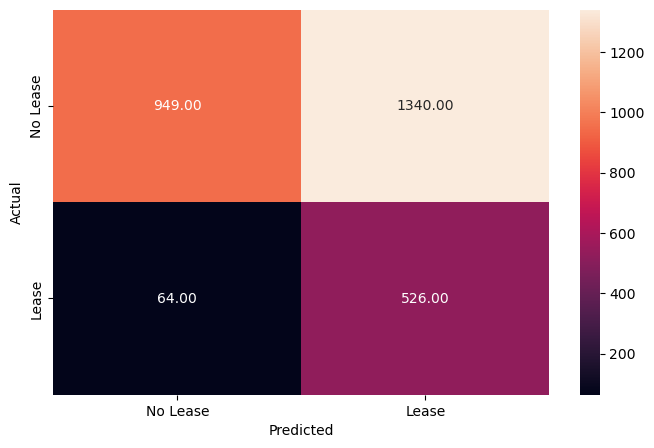

In [382]:
y_pred_train = model.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.95      0.40      0.57      2343
           1       0.26      0.90      0.40       536

    accuracy                           0.50      2879
   macro avg       0.60      0.65      0.48      2879
weighted avg       0.82      0.50      0.54      2879



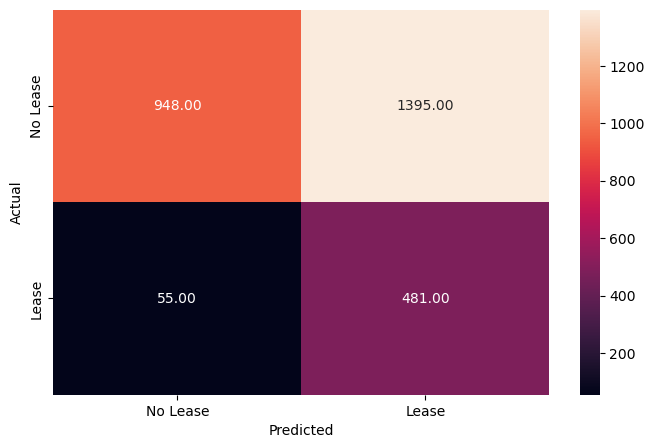

In [384]:
y_pred_test = model.predict(X_test)
metrics_score(y_test, y_pred_test)

In [386]:
cols=X.columns

coef=model.coef_

pd.DataFrame(coef,columns=cols).T.sort_values(by=0,ascending=False)

,0
AlreadyOwn,0.691106
ZIP Code,0.069694
Income,0.023734
CustomerID,0.017956
AccountID,0.017130
Family,0.017035
Age,-0.002727
5Seater,-0.011422
Experience,-0.032379


In [388]:
odds = np.exp(model.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
AlreadyOwn,1.995921
ZIP Code,1.072181
Income,1.024018
CustomerID,1.018118
AccountID,1.017277
Family,1.017181
Age,0.997277
5Seater,0.988643
Experience,0.968139


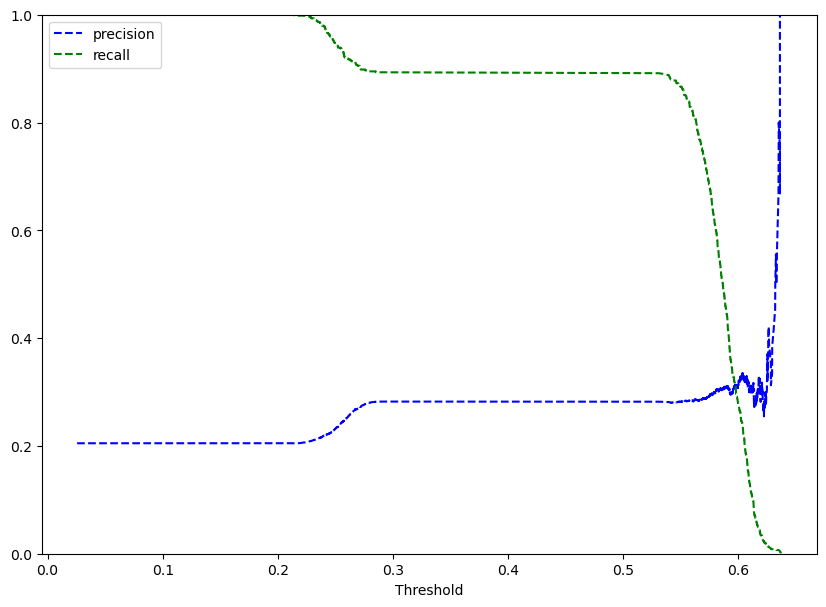

In [390]:
y_scores=model.predict_proba(X_train)


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2289
           1       0.31      0.28      0.30       590

    accuracy                           0.73      2879
   macro avg       0.57      0.56      0.56      2879
weighted avg       0.72      0.73      0.72      2879



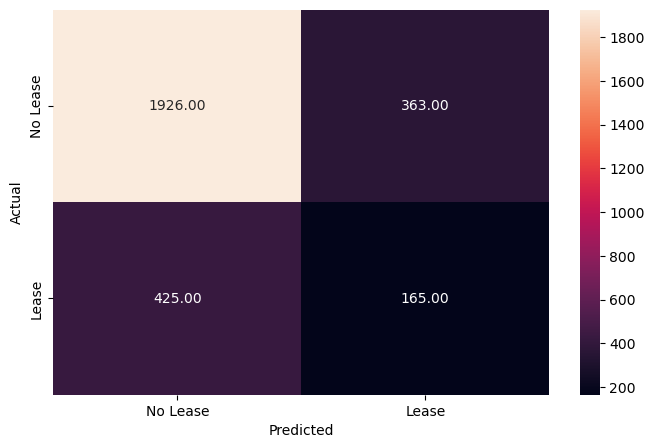

In [392]:
optimal_threshold1=.60
y_pred_train = model.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2343
           1       0.24      0.23      0.24       536

    accuracy                           0.72      2879
   macro avg       0.53      0.53      0.53      2879
weighted avg       0.72      0.72      0.72      2879



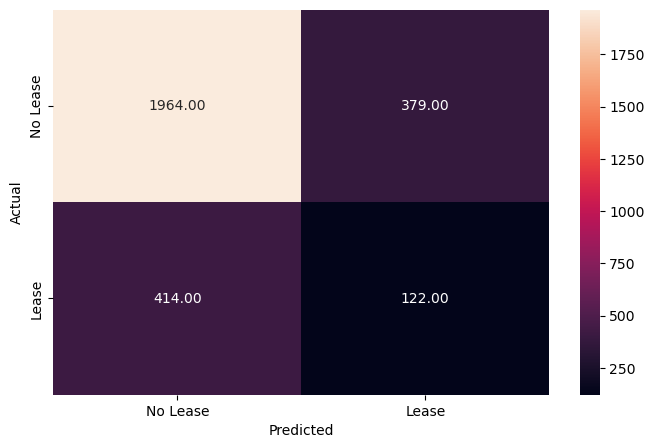

In [394]:
optimal_threshold1=.60
y_pred_train = model.predict_proba(X_test)
metrics_score(y_test, y_pred_train[:,1]>optimal_threshold1)